# 前処理

### スクレイピング関連

In [4]:
import requests
from bs4 import BeautifulSoup
import time
import csv
#取得開始年
year_start = 2024
#取得終了年
year_end = 2025

for year in range(year_start, year_end):
    race_data_all = []
    #取得するデータのヘッダー情報を先に追加しておく
    race_data_all.append(['race_id','馬','騎手','馬番','走破時間','オッズ','通過順','着順','体重','体重変化','性','齢','斤量','上がり','人気','レース名','日付','開催','クラス','芝・ダート','距離','回り','馬場','天気','場id','場名'])
    List=[]
    #競馬場
    l=["01","02","03","04","05","06","07","08","09","10"]
    for w in range(len(l)):
        place = ""
        if l[w] == "01":
            place = "札幌"
        elif l[w] == "02":
            place = "函館"
        elif l[w] == "03":
            place = "福島"
        elif l[w] == "04":
            place = "新潟"
        elif l[w] == "05":
            place = "東京"
        elif l[w] == "06":
            place = "中山"
        elif l[w] == "07":
            place = "中京"
        elif l[w] == "08":
            place = "京都"
        elif l[w] == "09":
            place = "阪神"
        elif l[w] == "10":
            place = "小倉"

        #開催回数分ループ（6回）
        for z in range(7):
            continueCounter = 0  # 'continue'が実行された回数をカウントするためのカウンターを追加
            #開催日数分ループ（12日）
            for y in range(13):
                race_id = ''
                if y<9:
                    race_id = str(year)+l[w]+"0"+str(z+1)+"0"+str(y+1)
                    url1="https://db.netkeiba.com/race/"+race_id
                else:
                    race_id = str(year)+l[w]+"0"+str(z+1)+str(y+1)
                    url1="https://db.netkeiba.com/race/"+race_id
                #yの更新をbreakするためのカウンター
                yBreakCounter = 0
                #レース数分ループ（12R）
                for x in range(12):
                    if x<9:
                        url=url1+str("0")+str(x+1)
                        current_race_id = race_id+str("0")+str(x+1)
                    else:
                        url=url1+str(x+1)
                        current_race_id = race_id+str(x+1)
                    try:
                        r=requests.get(url)
                    #リクエストを投げすぎるとエラーになることがあるため
                    #失敗したら10秒待機してリトライする
                    except requests.exceptions.RequestException as e:
                        print(f"Error: {e}")
                        print("Retrying in 10 seconds...")
                        time.sleep(10)  # 10秒待機
                        r=requests.get(url)
                    #バグ対策でdecode
                    soup = BeautifulSoup(r.content.decode("euc-jp", "ignore"), "html.parser")
                    soup_span = soup.find_all("span")
                    #馬の数
                    allnum=(len(soup_span)-6)/3
                    #urlにデータがあるか判定
                    if allnum < 1:
                        yBreakCounter+=1
                        print('continue:: ' + url)
                        continue
                    allnum=int(allnum)
                    race_data = []
                    for num in range(allnum):
                        #馬の情報
                        soup_txt_l=soup.find_all(class_="txt_l")
                        soup_txt_r=soup.find_all(class_="txt_r")
                        #走破時間
                        runtime=''
                        try:
                            runtime=soup_txt_r[2+5*num].contents[0]
                        except IndexError:
                            runtime = ''
                        soup_nowrap = soup.find_all("td",nowrap="nowrap",class_=None)
                        #通過順
                        pas = ''
                        try:
                            pas = str(soup_nowrap[3*num].contents[0])
                        except:
                            pas = ''
                        weight = 0
                        weight_dif = 0
                        #体重
                        var = soup_nowrap[3*num+1].contents[0]
                        try:
                            weight = int(var.split("(")[0])
                            weight_dif = int(var.split("(")[1][0:-1])
                        except ValueError:
                            weight = 0
                            weight_dif = 0
                        weight = weight
                        weight_dif = weight_dif

                        soup_tet_c = soup.find_all("td",nowrap="nowrap",class_="txt_c")
                        #上がり
                        last = ''
                        try:
                            last = soup_tet_c[6*num+3].contents[0].contents[0]
                        except IndexError:
                            last = ''
                        #人気
                        pop = ''
                        try:
                            pop = soup_span[3*num+10].contents[0]
                        except IndexError:
                            pop = ''
                        
                        #レースの情報
                        try:
                            var = soup_span[8]
                            sur=str(var).split("/")[0].split(">")[1][0]
                            rou=str(var).split("/")[0].split(">")[1][1]
                            dis=str(var).split("/")[0].split(">")[1].split("m")[0][-4:]
                            con=str(var).split("/")[2].split(":")[1][1]
                            wed=str(var).split("/")[1].split(":")[1][1]
                        except IndexError:
                            try:
                                var = soup_span[7]
                                sur=str(var).split("/")[0].split(">")[1][0]
                                rou=str(var).split("/")[0].split(">")[1][1]
                                dis=str(var).split("/")[0].split(">")[1].split("m")[0][-4:]
                                con=str(var).split("/")[2].split(":")[1][1]
                                wed=str(var).split("/")[1].split(":")[1][1]
                            except IndexError:
                                var = soup_span[6]
                                sur=str(var).split("/")[0].split(">")[1][0]
                                rou=str(var).split("/")[0].split(">")[1][1]
                                dis=str(var).split("/")[0].split(">")[1].split("m")[0][-4:]
                                con=str(var).split("/")[2].split(":")[1][1]
                                wed=str(var).split("/")[1].split(":")[1][1]
                        soup_smalltxt = soup.find_all("p",class_="smalltxt")
                        detail=str(soup_smalltxt).split(">")[1].split(" ")[1]
                        date=str(soup_smalltxt).split(">")[1].split(" ")[0]
                        clas=str(soup_smalltxt).split(">")[1].split(" ")[2].replace(u'\xa0', u' ').split(" ")[0]
                        title=str(soup.find_all("h1")[1]).split(">")[1].split("<")[0]

                        race_data = [
                            current_race_id,
                            soup_txt_l[4*num].contents[1].contents[0],#馬の名前
                            soup_txt_l[4*num+1].contents[1].contents[0],#騎手の名前
                            soup_txt_r[1+5*num].contents[0],#馬番
                            runtime,#走破時間
                            soup_txt_r[3+5*num].contents[0],#オッズ,
                            pas,#通過順
                            num+1,#着順
                            weight,#体重
                            weight_dif,#体重変化
                            soup_tet_c[6*num].contents[0][0],#性
                            soup_tet_c[6*num].contents[0][1],#齢
                            soup_tet_c[6*num+1].contents[0],#斤量
                            last,#上がり
                            pop,#人気,
                            title,#レース名
                            date,#日付
                            detail,
                            clas,#クラス
                            sur,#芝かダートか
                            dis,#距離
                            rou,#回り
                            con,#馬場状態
                            wed,#天気
                            w,#場
                            place]
                        race_data_all.append(race_data)
                    
                    print(detail+str(x+1)+"R")#進捗を表示
                    
                if yBreakCounter == 12:#12レース全部ない日が検出されたら、その開催中の最後の開催日と考える
                    break
    #1年毎に出力
    #出力先とファイル名は修正してください
    #年度ごとにファイルを分ける
    with open('data/'+str(year)+'.csv', 'w', newline='',encoding="SHIFT-JIS") as f:
        csv.writer(f).writerows(race_data_all)
    print("終了")

continue:: https://db.netkeiba.com/race/202401010101
continue:: https://db.netkeiba.com/race/202401010102
continue:: https://db.netkeiba.com/race/202401010103
continue:: https://db.netkeiba.com/race/202401010104
continue:: https://db.netkeiba.com/race/202401010105
continue:: https://db.netkeiba.com/race/202401010106
continue:: https://db.netkeiba.com/race/202401010107
continue:: https://db.netkeiba.com/race/202401010108
continue:: https://db.netkeiba.com/race/202401010109
continue:: https://db.netkeiba.com/race/202401010110
continue:: https://db.netkeiba.com/race/202401010111
continue:: https://db.netkeiba.com/race/202401010112
continue:: https://db.netkeiba.com/race/202401020101
continue:: https://db.netkeiba.com/race/202401020102
continue:: https://db.netkeiba.com/race/202401020103
continue:: https://db.netkeiba.com/race/202401020104
continue:: https://db.netkeiba.com/race/202401020105
continue:: https://db.netkeiba.com/race/202401020106
continue:: https://db.netkeiba.com/race/202401

KeyboardInterrupt: 

### 文字形式の修正

In [4]:
import pandas as pd
import os

# ディレクトリの設定
input_directory = './data/'  # 入力ファイルのディレクトリ
output_directory = './data/'  # 出力ファイルのディレクトリ

# 出力ディレクトリが存在しない場合は作成
os.makedirs(output_directory, exist_ok=True)

# 2010年から2015年までのデータを処理
for year in range(2010, 2016):
    file_path = os.path.join(input_directory, f'{year}.csv')  # 年ごとのファイルパス
    fixed_file_path = os.path.join(output_directory, f'fixed_keiba_{year}.csv')  # 出力ファイルパス

    try:
        # 元のCSVファイルを読み込む
        df = pd.read_csv(file_path, encoding='SHIFT-JIS')  # SHIFT-JISエンコーディングで読み込む
        
        # UTF-8-SIGで新しいファイルに保存
        df.to_csv(fixed_file_path, encoding='utf-8-sig', index=False)
        print(f"{year}年のデータを修正し、保存しました: {fixed_file_path}")
    
    except FileNotFoundError:
        print(f"{year}年のデータファイルが見つかりませんでした: {file_path}")
    except Exception as e:
        print(f"{year}年のデータ処理中にエラーが発生しました: {e}")


2010年のデータを修正し、保存しました: ./data/fixed_keiba_2010.csv
2011年のデータを修正し、保存しました: ./data/fixed_keiba_2011.csv
2012年のデータを修正し、保存しました: ./data/fixed_keiba_2012.csv
2013年のデータを修正し、保存しました: ./data/fixed_keiba_2013.csv
2014年のデータを修正し、保存しました: ./data/fixed_keiba_2014.csv
2015年のデータを修正し、保存しました: ./data/fixed_keiba_2015.csv


In [5]:
import csv
import os

# Define the mapping of column names from Japanese to English
columns_japanese_to_english = {
    'race_id': 'race_id',
    '馬': 'horse',
    '騎手': 'jockey',
    '馬番': 'horse_number',
    '走破時間': 'finishing_time',
    'オッズ': 'odds',
    '通過順': 'passing_order',
    '着順': 'rank',
    '体重': 'weight',
    '体重変化': 'weight_change',
    '性': 'sex',
    '齢': 'age',
    '斤量': 'handicap_weight',
    '上がり': 'last_spurt',
    '人気': 'popularity',
    'レース名': 'race_name',
    '日付': 'date',
    '開催': 'meeting',
    'クラス': 'class',
    '芝・ダート': 'turf_or_dirt',
    '距離': 'distance',
    '回り': 'course_type',
    '馬場': 'track_condition',
    '天気': 'weather',
    '場id': 'venue_id',
    '場名': 'venue_name'
}

# Directory paths
input_directory = './data/'  # データの入力ディレクトリ
output_directory = './new_data_set/'  # 出力ディレクトリ

# 出力ディレクトリが存在しない場合は作成
os.makedirs(output_directory, exist_ok=True)

# 2010年から2015年までのデータを処理
for year in range(2010, 2016):
    input_filename = os.path.join(input_directory, f'fixed_keiba_{year}.csv')
    output_filename = os.path.join(output_directory, f'keiba_result_{year}.csv')

    try:
        with open(input_filename, mode='r', encoding='utf-8-sig') as infile, open(output_filename, mode='w', newline='', encoding='utf-8') as outfile:
            reader = csv.DictReader(infile)
            # 新しいDictWriterを英語のカラム名で作成
            writer = csv.DictWriter(outfile, fieldnames=list(columns_japanese_to_english.values()))
            # ヘッダーを英語のカラム名で書き込む
            writer.writeheader()
            # 元のファイルから各行を読み込み、カラム名を翻訳して新しいファイルに書き込む
            for row in reader:
                translated_row = {columns_japanese_to_english[key]: value for key, value in row.items() if key in columns_japanese_to_english}
                writer.writerow(translated_row)

        print(f"{year}年のデータが処理され、{output_filename} に保存されました。")
    except FileNotFoundError:
        print(f"{year}年のデータファイルが見つかりませんでした: {input_filename}")
    except UnicodeDecodeError as e:
        print(f"{year}年のCSVファイルの読み込み中にエラーが発生しました: {e}。ファイルのエンコーディングを確認してください。")


2010年のデータが処理され、./new_data_set/keiba_result_2010.csv に保存されました。
2011年のデータが処理され、./new_data_set/keiba_result_2011.csv に保存されました。
2012年のデータが処理され、./new_data_set/keiba_result_2012.csv に保存されました。
2013年のデータが処理され、./new_data_set/keiba_result_2013.csv に保存されました。
2014年のデータが処理され、./new_data_set/keiba_result_2014.csv に保存されました。
2015年のデータが処理され、./new_data_set/keiba_result_2015.csv に保存されました。


### データ結合

In [1]:
# 必要なライブラリのインポート
import pandas as pd
import glob

# ファイルパスの設定
data_path = "./train_data_set"
file_pattern = f"{data_path}/keiba_result_*.csv"
output_directory = "./processed_data_set"


# 全年度のCSVファイルを結合
all_files = glob.glob(file_pattern)
df_list = []

for file in all_files:
    # 年度を取得
    year = file.split('_')[-1].split('.')[0]
    
    # データの読み込み
    df = pd.read_csv(file)
    df['year'] = year  # 年度を追加
    df_list.append(df)

# データフレームの結合
data = pd.concat(df_list, ignore_index=True)

# finishing_time を秒数に変換
def time_to_seconds(time_str):
    if pd.isna(time_str):
        return None
    try:
        minutes, seconds = map(float, time_str.split(':'))
        return minutes * 60 + seconds
    except ValueError:
        return None

data['finishing_time_seconds'] = data['finishing_time'].apply(time_to_seconds)

# 馬ごとの時系列順にソート
data = data.sort_values(['horse', 'date'])

# 出走頭数を計算
data['sum_num'] = data.groupby('race_id')['horse'].transform('count')

# 過去レースデータに追加するカラムを定義
columns_to_add = [
    "venue_name",       # 開催場所
    "weather",          # 天気
    "race_id",          # レース番号
    "horse_number",     # 馬番
    "rank",             # 順位
    "turf_or_dirt",     # 芝orダート
    "distance",         # 距離
    "track_condition",  # 馬場状態
    "weight_change",    # 馬場指数（仮の代替列）
    "popularity",       # タイム指数（仮の代替列）
    "last_spurt"        # 上がり3ハロンのタイム
]

# 過去レースデータの作成（例: 過去3レース分）
for i in range(1, 4):
    for col in columns_to_add:
        data[f'past_{i}_{col}'] = data.groupby('horse')[col].shift(i)

# 追加の特徴量作成
# 当日の特徴量
data['month'] = pd.to_datetime(data['date'], errors='coerce').dt.month
data['kai'] = data['meeting'].str.extract(r'(\d+)回').astype(float)  # 第何回目か
data['day'] = data['meeting'].str.extract(r'(\d+)日目').astype(float)  # 開催何日目か
data['race_num'] = data['race_id'].astype(str).str[-2:].astype(float)  # 何Rか
data['field'] = data['turf_or_dirt']
data['dist'] = data['distance']
data['turn'] = data['course_type']
data['field_cond'] = data['track_condition']
data['place'] = data['venue_name']
data['prize'] = 0  # 優勝賞金データがないため仮に0を設定

# 前走からの日数を計算
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['prev_date'] = data.groupby('horse')['date'].shift(1)
data['l_days'] = (data['date'] - data['prev_date']).dt.days

# 過去データのカラム追加
for i in range(1, 4):  # 過去3レース分
    data[f'p_place_{i}'] = data.groupby('horse')['venue_name'].shift(i)
    data[f'p_weather_{i}'] = data.groupby('horse')['weather'].shift(i)
    data[f'p_race_num_{i}'] = data.groupby('horse')['race_id'].shift(i)
    data[f'p_sum_num_{i}'] = data.groupby('horse')['sum_num'].shift(i)
    data[f'p_horse_num_{i}'] = data.groupby('horse')['horse_number'].shift(i)
    data[f'p_rank_{i}'] = data.groupby('horse')['rank'].shift(i)
    data[f'p_field_{i}'] = data.groupby('horse')['turf_or_dirt'].shift(i)
    data[f'p_dist_{i}'] = data.groupby('horse')['distance'].shift(i)
    data[f'p_condi_{i}'] = data.groupby('horse')['track_condition'].shift(i)
    data[f'p_last3F_{i}'] = data.groupby('horse')['last_spurt'].shift(i)
    # 馬場指数（仮として weight_change を使用）
    data[f'p_condi_num_{i}'] = data.groupby('horse')['weight_change'].shift(i)
    # タイム指数（仮として finishing_time_seconds をそのまま使用）
    data[f'p_time_num_{i}'] = data.groupby('horse')['finishing_time_seconds'].shift(i)

# 欠損値処理（過去レースデータがない場合を -1 で補完）
data.fillna(-1, inplace=True)

# 加工済みデータの保存
output_file = f"{output_directory}/processed_keiba_data_with_past_full.csv"
data.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"加工済みデータを {output_file} に保存しました。")

/var/folders/by/b0fpmcl53nz2m_3dxktpq4940000gn/T/ipykernel_33191/1270766421.py:67: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['month'] = pd.to_datetime(data['date'], errors='coerce').dt.month
/var/folders/by/b0fpmcl53nz2m_3dxktpq4940000gn/T/ipykernel_33191/1270766421.py:79: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'], errors='coerce')
/var/folders/by/b0fpmcl53nz2m_3dxktpq4940000gn/T/ipykernel_33191/1270766421.py:101: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  data.fillna(-1,

加工済みデータを ./processed_data_set/processed_keiba_data_with_past_full.csv に保存しました。


### 年度に応じて分ける

In [2]:
# 必要なライブラリのインポート
import pandas as pd
import glob

# ファイルパスの設定
data_path = "./train_data_set"
file_pattern = f"{data_path}/keiba_result_*.csv"
output_directory = "./processed_data_set"

# 全年度のCSVファイルを結合
all_files = glob.glob(file_pattern)
df_list = []

for file in all_files:
    # 年度を取得
    year = file.split('_')[-1].split('.')[0]
    # データの読み込み
    df = pd.read_csv(file)
    df['year'] = int(year)  # 年度を追加（整数型に変換）
    df_list.append(df)

# データフレームの結合
data = pd.concat(df_list, ignore_index=True)

# finishing_time を秒数に変換
def time_to_seconds(time_str):
    if pd.isna(time_str):
        return None
    try:
        minutes, seconds = map(float, time_str.split(':'))
        return minutes * 60 + seconds
    except ValueError:
        return None

data['finishing_time_seconds'] = data['finishing_time'].apply(time_to_seconds)

# 馬ごとの時系列順にソート
data = data.sort_values(['horse', 'date'])

# 出走頭数を計算
data['sum_num'] = data.groupby('race_id')['horse'].transform('count')

# 過去レースデータに追加するカラムを定義
columns_to_add = [
    "venue_name", "weather", "race_id", "horse_number", "rank",
    "turf_or_dirt", "distance", "track_condition", "weight_change",
    "popularity", "last_spurt"
]

# 過去レースデータの作成（例: 過去3レース分）
for i in range(1, 4):
    for col in columns_to_add:
        data[f'past_{i}_{col}'] = data.groupby('horse')[col].shift(i)

# 追加の特徴量作成
# 当日の特徴量
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['month'] = data['date'].dt.month
data['kai'] = data['meeting'].str.extract(r'(\d+)回').astype(float)  # 第何回目か
data['day'] = data['meeting'].str.extract(r'(\d+)日目').astype(float)  # 開催何日目か
data['race_num'] = data['race_id'].astype(str).str[-2:].astype(float)  # 何Rか
data['field'] = data['turf_or_dirt']
data['dist'] = data['distance']
data['turn'] = data['course_type']
data['field_cond'] = data['track_condition']
data['place'] = data['venue_name']
data['prize'] = 0  # 優勝賞金データがないため仮に0を設定

# 前走からの日数を計算
data['prev_date'] = data.groupby('horse')['date'].shift(1)
data['l_days'] = (data['date'] - data['prev_date']).dt.days.fillna(-1).astype(int)

# 過去データのカラム追加
for i in range(1, 4):  # 過去3レース分
    data[f'p_place_{i}'] = data.groupby('horse')['venue_name'].shift(i)
    data[f'p_weather_{i}'] = data.groupby('horse')['weather'].shift(i)
    data[f'p_race_num_{i}'] = data.groupby('horse')['race_id'].shift(i)
    data[f'p_sum_num_{i}'] = data.groupby('horse')['sum_num'].shift(i)
    data[f'p_horse_num_{i}'] = data.groupby('horse')['horse_number'].shift(i)
    data[f'p_rank_{i}'] = data.groupby('horse')['rank'].shift(i)
    data[f'p_field_{i}'] = data.groupby('horse')['turf_or_dirt'].shift(i)
    data[f'p_dist_{i}'] = data.groupby('horse')['distance'].shift(i)
    data[f'p_condi_{i}'] = data.groupby('horse')['track_condition'].shift(i)
    data[f'p_last3F_{i}'] = data.groupby('horse')['last_spurt'].shift(i)
    data[f'p_condi_num_{i}'] = data.groupby('horse')['weight_change'].shift(i)
    data[f'p_time_num_{i}'] = data.groupby('horse')['finishing_time_seconds'].shift(i)

# 欠損値処理（過去レースデータがない場合を -1 で補完）
data.fillna(-1, inplace=True)

# データを2022年以前と2023年に分割
train_data = data[data['year'] <= 2022]
test_data = data[data['year'] == 2023]

# データの保存
train_file = f"{output_directory}/processed_keiba_train_data.csv"
test_file = f"{output_directory}/processed_keiba_test_data.csv"

train_data.to_csv(train_file, index=False, encoding='utf-8-sig')
test_data.to_csv(test_file, index=False, encoding='utf-8-sig')

print(f"トレーニングデータを {train_file} に保存しました。")
print(f"テストデータを {test_file} に保存しました。")


/var/folders/by/b0fpmcl53nz2m_3dxktpq4940000gn/T/ipykernel_33191/3670593795.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'], errors='coerce')
/var/folders/by/b0fpmcl53nz2m_3dxktpq4940000gn/T/ipykernel_33191/3670593795.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  data.fillna(-1, inplace=True)
/var/folders/by/b0fpmcl53nz2m_3dxktpq4940000gn/T/ipykernel_33191/3670593795.py:89: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_

トレーニングデータを ./processed_data_set/processed_keiba_train_data.csv に保存しました。
テストデータを ./processed_data_set/processed_keiba_test_data.csv に保存しました。


# モデル学習

### 競馬場に関わらず学習

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier 

# データの読み込み
data_path = "./processed_data_set/processed_keiba_data_with_past_full.csv"
data = pd.read_csv(data_path)

# finishing_time_seconds が -1 (欠損値) のデータは除外
data = data[data['finishing_time_seconds'] != -1]

# 出走頭数を計算
data['num_horses'] = data.groupby('race_id')['horse'].transform('count')

# 順位をグループ化 (3つのクラスに分ける)
def rank_to_group(rank, num_horses):
    """順位を3つのグループに分ける"""
    if rank <= 3:
        return 0  # 上位1/3
    elif rank <= 2 * (num_horses // 3):
        return 1  # 中間1/3
    else:
        return 2  # 下位1/3

# グループラベルを作成
data['group'] = data.apply(lambda x: rank_to_group(x['rank'], x['num_horses']), axis=1)

# 出走頭数の半分以下しかデータがないレースは除外
valid_races = data.groupby('race_id').filter(lambda x: len(x) > x['num_horses'].iloc[0] // 2)
data = data[data['race_id'].isin(valid_races['race_id'].unique())]

# 特徴量の定義
features = [
    'month', 'kai', 'day', 'race_num', 'turf_or_dirt', 'distance', 'course_type', 'weather', 'track_condition', 'venue_name',
    'sum_num', 'prize', 'horse_number', 'sex', 'age', 'handicap_weight', 'weight', 'weight_change',
    'l_days',
    # 過去のパフォーマンス関連の特徴量を追加
    'past_1_rank', 'past_2_rank', 'past_3_rank',
    'past_1_last_spurt', 'past_2_last_spurt', 'past_3_last_spurt'
] + [
    f'p_place_{i}' for i in range(1, 4)
] + [
    f'p_weather_{i}' for i in range(1, 4)
] + [
    f'p_race_num_{i}' for i in range(1, 4)
] + [
    f'p_sum_num_{i}' for i in range(1, 4)
] + [
    f'p_horse_num_{i}' for i in range(1, 4)
] + [
    f'p_rank_{i}' for i in range(1, 4)
] + [
    f'p_field_{i}' for i in range(1, 4)
] + [
    f'p_dist_{i}' for i in range(1, 4)
] + [
    f'p_condi_{i}' for i in range(1, 4)
] + [
    f'p_condi_num_{i}' for i in range(1, 4)
] + [
    f'p_time_num_{i}' for i in range(1, 4)
] + [
    f'p_last3F_{i}' for i in range(1, 4)
]

# 特徴量と目的変数を分割
X = data[features]
y = data['group']

# カテゴリカル特徴量のエンコーディング（One-Hot Encoding）
categorical_features = ['turf_or_dirt', 'weather', 'track_condition', 'venue_name', 'sex', 'course_type']  # 'course_type' を追加
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# データ型の確認と変換
# すべての列を数値型に変換し、変換できないものは NaN にする
X = X.apply(pd.to_numeric, errors='coerce')

# 非数値型の列が存在するか確認
non_numeric_cols = X.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print("数値に変換できなかった列が存在します。以下の列を確認してください:")
    print(non_numeric_cols)
    # 必要に応じて、これらの列を削除またはエンコード
    # ここでは一旦削除します
    X = X.drop(columns=non_numeric_cols)

# 欠損値の処理（中央値で埋める）
X.fillna(X.median(), inplace=True)

# 再度データ型を確認
print("\n特徴量のデータ型:")
print(X.dtypes)

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# scikit-learn の GradientBoostingClassifier を初期化
clf = GradientBoostingClassifier(
    # loss='deviance',         # 多クラス分類のための損失関数（デフォルト）
    n_estimators=1000,       # ブースト回数
    learning_rate=0.1,       # 学習率
    max_depth=3,             # 各決定木の深さ
    min_samples_leaf=20,     # 葉に必要な最小サンプル数
    random_state=42,
    n_iter_no_change=50,     # 早期停止のための許容回数
    validation_fraction=0.2, # 検証用データの割合
    tol=1e-4,                # 早期停止の閾値
    verbose=1                # 学習過程の出力
)

# モデルの訓練（早期停止を使用）
print("GradientBoostingClassifierの学習を開始...")
clf.fit(X_train, y_train)
print("モデルの学習が完了しました！")

# テストデータで予測
y_pred_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

# 分類結果の評価
print("\n分類結果の評価:")
print(classification_report(y_test, y_pred))

import pickle

# モデルを保存する
with open('gradient_boosting_model_1.pkl', 'wb') as f:
    pickle.dump(clf, f)

print("モデルを保存しました！")




特徴量のデータ型:
month            float64
kai              float64
day              float64
race_num         float64
distance           int64
                  ...   
sex_牝               bool
sex_牡               bool
course_type_左       bool
course_type_直       bool
course_type_芝       bool
Length: 78, dtype: object
GradientBoostingClassifierの学習を開始...
      Iter       Train Loss   Remaining Time 
         1           1.0520          125.59m
         2           1.0433          125.70m
         3           1.0362          125.60m
         4           1.0299          125.26m
         5           1.0248          125.15m
         6           1.0200          125.12m
         7           1.0160          125.10m
         8           1.0126          125.13m
         9           1.0094          125.10m
        10           1.0066          125.00m
        20           0.9906          123.93m
        30           0.9826          122.88m
        40           0.9773          121.62m
        50           

# 検証

### 東京競馬場に限定した検証

/var/folders/by/b0fpmcl53nz2m_3dxktpq4940000gn/T/ipykernel_33191/3810541802.py:193: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data_matched['odds'].fillna(test_data_matched['odds'].median(), inplace=True)


Race ID 201005010101: Difference between top1 and top2 is less than 0.1 (0.15). Skipping.
Race ID 201005010102: Difference between top1 and top2 is less than 0.1 (0.16). Skipping.
Race ID 201005010103: Difference between top1 and top2 is less than 0.1 (0.02). Skipping.
Race ID 201005010104: Difference between top1 and top2 is less than 0.1 (0.02). Skipping.
Race ID 201005010105: Difference between top1 and top2 is less than 0.1 (0.17). Skipping.
Race ID 201005010106: Difference between top1 and top2 is less than 0.1 (0.02). Skipping.
Race ID 201005010107: Difference between top1 and top2 is less than 0.1 (0.01). Skipping.
Race ID 201005010108: Difference between top1 and top2 is less than 0.1 (0.07). Skipping.
Race ID 201005010109: Difference between top1 and top2 is less than 0.1 (0.02). Skipping.
Race ID 201005010110: Difference between top1 and top2 is less than 0.1 (0.06). Skipping.
Race ID 201005010111: Difference between top1 and top2 is less than 0.1 (0.02). Skipping.
Race ID 20

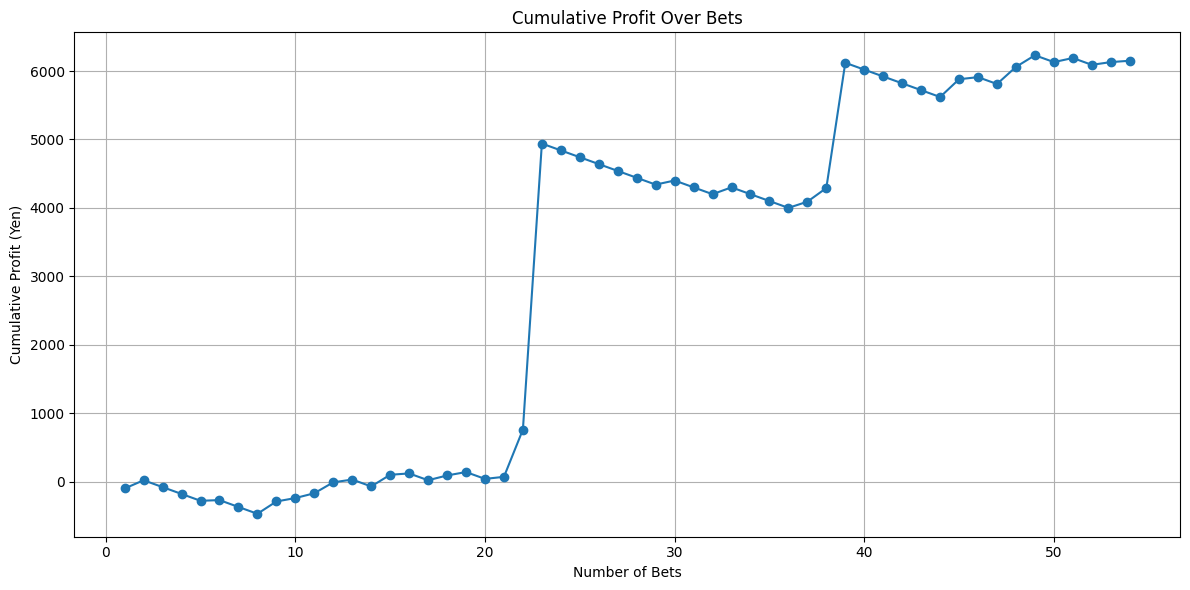

In [4]:
# 必要なライブラリをインポート
# ! 東京に限定したモデルを使用
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

import pickle
model_path = 'model/gradient_boosting_model_tokyo.pkl'
with open(model_path, 'rb') as f:
    clf = pickle.load(f)

# 検証用データの読み込み
test_data_path = "./processed_data_set/processed_keiba_train_data.csv"
test_data = pd.read_csv(test_data_path)

# 東京競馬場のデータに限定
test_data = test_data[test_data['venue_name'] == "東京"]

# データの前処理
# finishing_time_seconds が -1 (欠損値) のデータを除外
test_data = test_data[test_data['finishing_time_seconds'] != -1]

# 出走頭数を計算
test_data['num_horses'] = test_data.groupby('race_id')['horse'].transform('count')

# 順位を3つのグループに分ける関数（学習時と同じ関数を再利用）
def rank_to_group(rank, num_horses):
    if rank <= 3 :
        return 0  # 上位1/3
    elif rank <= 2 * (num_horses // 3):
        return 1  # 中位1/3
    else:
        return 2  # 下位1/3

# グループラベルを作成
test_data['group'] = test_data.apply(lambda x: rank_to_group(x['rank'], x['num_horses']), axis=1)

features = [
    'month', 'kai', 'day', 'race_num', 'turf_or_dirt', 'distance', 'course_type', 'weather', 'track_condition', 'venue_name',
    'sum_num', 'prize', 'horse_number', 'sex', 'age', 'handicap_weight', 'weight', 'weight_change',
    'l_days',
    'past_1_rank', 'past_2_rank', 'past_3_rank',
    'past_1_last_spurt', 'past_2_last_spurt', 'past_3_last_spurt'
] + [
    f'p_place_{i}' for i in range(1, 4)
] + [
    f'p_weather_{i}' for i in range(1, 4)
] + [
    f'p_race_num_{i}' for i in range(1, 4)
] + [
    f'p_sum_num_{i}' for i in range(1, 4)
] + [
    f'p_horse_num_{i}' for i in range(1, 4)
] + [
    f'p_rank_{i}' for i in range(1, 4)
] + [
    f'p_field_{i}' for i in range(1, 4)
] + [
    f'p_dist_{i}' for i in range(1, 4)
] + [
    f'p_condi_{i}' for i in range(1, 4)
] + [
    f'p_condi_num_{i}' for i in range(1, 4)
] + [
    f'p_time_num_{i}' for i in range(1, 4)
] + [
    f'p_last3F_{i}' for i in range(1, 4)
]


# 特徴量と目的変数を分割
X_test = test_data[features]
y_test = test_data['group']

# カテゴリカル特徴量のエンコーディング（学習時と同じ方法で）
categorical_features = ['turf_or_dirt', 'weather', 'track_condition', 'venue_name', 'sex', 'course_type']
X_test = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

# データ型の確認と変換
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# 特徴量の補完を確認
missing_features = [feature for feature in clf.feature_names_in_ if feature not in X_test.columns]
# if missing_features:
#     print("\n以下の特徴量が検証データに欠落しています:")
#     print(missing_features)
#     # 欠落した特徴量をゼロで補完
#     for feature in missing_features:
#         X_test[feature] = 0

# 再確認: 検証データに不要な特徴量を削除
extra_features = [feature for feature in X_test.columns if feature not in clf.feature_names_in_]
# if extra_features:
#     print("\n以下の特徴量が検証データに余分に含まれています（削除します）:")
#     print(extra_features)
#     X_test = X_test.drop(columns=extra_features)

# 欠損値を処理
X_test.fillna(X_test.median(), inplace=True)

# モデルで予測（学習済みモデルを再利用）
y_pred_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

# 単勝馬券収支計算関数の拡張
def calculate_profit(predictions, data, X_test_indices):
    """単勝馬券の収支、的中回数、ベット回数、的中率、累積利益を計算"""
    profit = 0
    hits = 0
    bets = 0
    cumulative_profits = []  # 累積利益を追跡するリスト

    for race_id, group in data.groupby('race_id'):
        # グループ内のインデックスを X_test の位置に対応付け
        group_indices = group.index.intersection(X_test_indices)
        if len(group_indices) == 0:  # グループ内に予測がない場合はスキップ
            continue

        # 過去データが3走以上ある馬を判定
        valid_horses = group.dropna(subset=['past_1_rank', 'past_2_rank', 'past_3_rank'])
        if len(valid_horses) <= len(group) / 2:
            # 有効な馬が出走頭数の2/3以下なら購入しない
            print(f"Race ID {race_id}: 過去データが3走以上ある馬が少ないためスキップします。")
            continue

        # グループ内インデックスを X_test の行番号に変換
        try:
            locs = [X_test_indices.get_loc(idx) for idx in group_indices]
        except KeyError as e:
            print(f"Index {e} が X_test に見つかりませんでした。スキップします。")
            continue

        # 馬ごとの予測確率（クラス0の確率）
        # クラスの順序を確認
        try:
            class_index = list(clf.classes_).index(0)  # クラス0のインデックスを取得
        except ValueError:
            print("モデルのクラスにクラス0が存在しません。")
            continue
        

        preds = predictions[locs, class_index]
        if len(preds) == 0:
            continue  # 予測がない場合はスキップ

        # グループ0の予測確率が1つの場合、その馬にベット
        if len(preds) == 1:
            top_horse_loc = 0
            top_horse_idx = group_indices[top_horse_loc]
            top_horse = group.loc[top_horse_idx]
        elif len(preds) >= 2:
            # 予測確率が高い順にソート
            sorted_indices = np.argsort(preds)[::-1]  # 降順にソート
            top1_pred = preds[sorted_indices[0]]
            top2_pred = preds[sorted_indices[1]]
            diff = top1_pred - top2_pred

            if diff < 0.3:
                # 差が0.1未満なら購入しない
                print(f"Race ID {race_id}: Difference between top1 and top2 is less than 0.1 ({diff:.2f}). Skipping.")
                continue

            # 差が0.1以上ならトップ1の馬にベット
            top_horse_loc = sorted_indices[0]
            top_horse_idx = group_indices[top_horse_loc]
            top_horse = group.loc[top_horse_idx]
        else:
            # その他のケース（予期せぬ場合）をスキップ
            print(f"Race ID {race_id}: Unexpected number of predictions ({len(preds)}). Skipping.")
            continue

        # 単勝馬券収支計算: rank が 1 なら的中
        if top_horse['rank'] == 1:  # 的中した場合
            profit_change = (top_horse['odds'] * 100) - 100
            profit += profit_change
            hits += 1
        else:  # 外れた場合
            profit_change = -100
            profit += profit_change
        bets += 1
        cumulative_profits.append(profit)  # 現在の累積利益を追加

    hit_rate = (hits / bets) * 100 if bets > 0 else 0
    return profit, hits, bets, hit_rate, cumulative_profits

# テストデータの収支と的中回数を計算
X_test_indices = X_test.index  # X_test のインデックスを取得
test_data_matched = test_data.loc[X_test_indices]  # X_test に対応するデータを抽出

if 'odds' in test_data_matched.columns:
    test_data_matched['odds'] = pd.to_numeric(test_data_matched['odds'], errors='coerce')
    test_data_matched['odds'].fillna(test_data_matched['odds'].median(), inplace=True)
    profit, hits, bets, hit_rate, cumulative_profits = calculate_profit(y_pred_proba, test_data_matched, X_test_indices)
    print(f"\nTotal Profit: {profit} Yen")
    print(f"Number of Bets: {bets} times")
    print(f"Number of Hits: {hits} times")
    print(f"Hit Rate: {hit_rate:.2f}%")

    # グラフを描画
    if cumulative_profits:
        plt.figure(figsize=(12, 6))
        plt.plot(range(1, len(cumulative_profits) + 1), cumulative_profits, marker='o', linestyle='-')
        plt.title('Cumulative Profit Over Bets')
        plt.xlabel('Number of Bets')
        plt.ylabel('Cumulative Profit (Yen)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("No bets were placed, so no profit graph to display.")
else:
    print("\nThe 'odds' column does not exist in the data. Cannot calculate profit.")

### 競馬場に限定せずに検証

/var/folders/by/b0fpmcl53nz2m_3dxktpq4940000gn/T/ipykernel_33191/2162164682.py:180: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data_matched['odds'].fillna(test_data_matched['odds'].median(), inplace=True)


Race ID 202301010101: Difference between top1 and top2 is less than 0.1 (0.17). Skipping.
Race ID 202301010102: Difference between top1 and top2 is less than 0.1 (0.03). Skipping.
Race ID 202301010103: Difference between top1 and top2 is less than 0.1 (0.00). Skipping.
Race ID 202301010105: Difference between top1 and top2 is less than 0.1 (0.12). Skipping.
Race ID 202301010106: Difference between top1 and top2 is less than 0.1 (0.10). Skipping.
Race ID 202301010107: Difference between top1 and top2 is less than 0.1 (0.17). Skipping.
Race ID 202301010108: Difference between top1 and top2 is less than 0.1 (0.10). Skipping.
Race ID 202301010109: Difference between top1 and top2 is less than 0.1 (0.14). Skipping.
Race ID 202301010110: Difference between top1 and top2 is less than 0.1 (0.05). Skipping.
Race ID 202301010111: Difference between top1 and top2 is less than 0.1 (0.24). Skipping.
Race ID 202301010201: Difference between top1 and top2 is less than 0.1 (0.24). Skipping.
Race ID 20

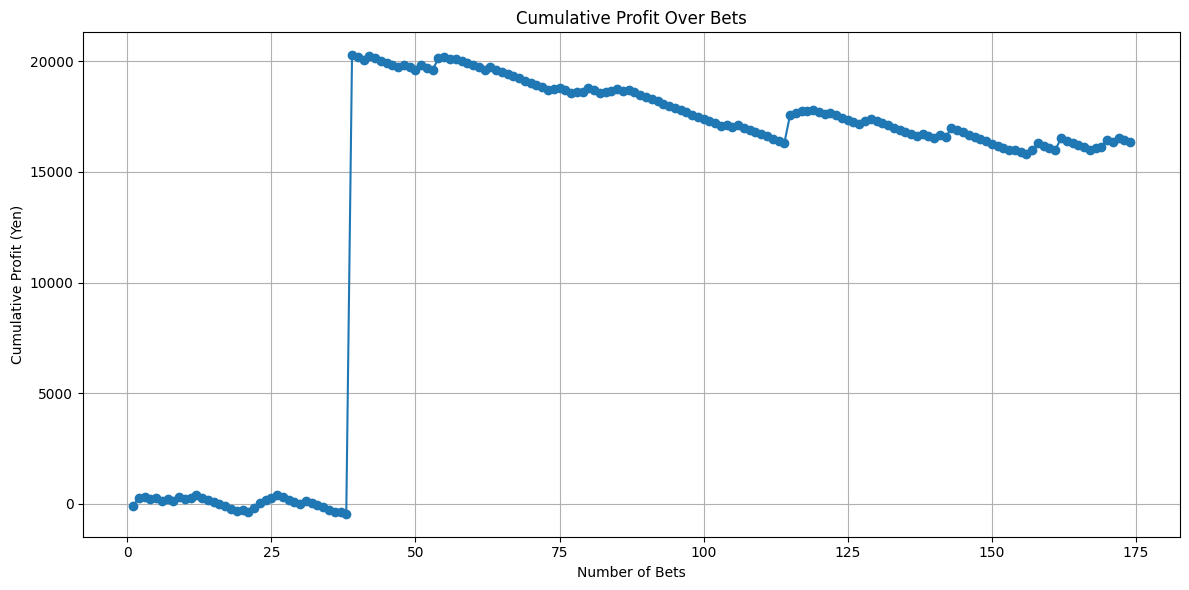

In [5]:
# 必要なライブラリをインポート
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

import pickle
model_path = 'model/gradient_boosting_model_1.pkl'
with open(model_path, 'rb') as f:
    clf = pickle.load(f)

# 検証用データの読み込み
test_data_path = "./processed_data_set/processed_keiba_test_data.csv"
test_data = pd.read_csv(test_data_path)

# データの前処理
# finishing_time_seconds が -1 (欠損値) のデータを除外
test_data = test_data[test_data['finishing_time_seconds'] != -1]

# 出走頭数を計算
test_data['num_horses'] = test_data.groupby('race_id')['horse'].transform('count')

# 単勝馬券収支計算関数の拡張
def calculate_profit(predictions, data, X_test_indices):
    """単勝馬券の収支、的中回数、ベット回数、的中率、累積利益を計算"""
    profit = 0
    hits = 0
    bets = 0
    cumulative_profits = []  # 累積利益を追跡するリスト

    for race_id, group in data.groupby('race_id'):
        # グループ内のインデックスを X_test の位置に対応付け
        group_indices = group.index.intersection(X_test_indices)
        if len(group_indices) == 0:  # グループ内に予測がない場合はスキップ
            continue

        # 過去データが3走以上ある馬を判定
        valid_horses = group.dropna(subset=['past_1_rank', 'past_2_rank', 'past_3_rank'])
        if len(valid_horses) <= len(group) / 2:
            # 有効な馬が出走頭数の2/3以下なら購入しない
            print(f"Race ID {race_id}: 過去データが3走以上ある馬が少ないためスキップします。")
            continue

        # グループ内インデックスを X_test の行番号に変換
        try:
            locs = [X_test_indices.get_loc(idx) for idx in group_indices]
        except KeyError as e:
            print(f"Index {e} が X_test に見つかりませんでした。スキップします。")
            continue

        # 馬ごとの予測確率（クラス0の確率）
        # クラスの順序を確認
        try:
            class_index = list(clf.classes_).index(0)  # クラス0のインデックスを取得
        except ValueError:
            print("モデルのクラスにクラス0が存在しません。")
            continue

        preds = predictions[locs, class_index]
        if len(preds) == 0:
            continue  # 予測がない場合はスキップ

        # グループ0の予測確率が1つの場合、その馬にベット
        if len(preds) == 1:
            top_horse_loc = 0
            top_horse_idx = group_indices[top_horse_loc]
            top_horse = group.loc[top_horse_idx]
        elif len(preds) >= 2:
            # 予測確率が高い順にソート
            sorted_indices = np.argsort(preds)[::-1]  # 降順にソート
            top1_pred = preds[sorted_indices[0]]
            top2_pred = preds[sorted_indices[1]]
            diff = top1_pred - top2_pred

            if diff < 0.25:
                # 差が0.1未満なら購入しない
                print(f"Race ID {race_id}: Difference between top1 and top2 is less than 0.1 ({diff:.2f}). Skipping.")
                continue

            # 差が0.1以上ならトップ1の馬にベット
            top_horse_loc = sorted_indices[0]
            top_horse_idx = group_indices[top_horse_loc]
            top_horse = group.loc[top_horse_idx]
        else:
            # その他のケース（予期せぬ場合）をスキップ
            print(f"Race ID {race_id}: Unexpected number of predictions ({len(preds)}). Skipping.")
            continue

        # 単勝馬券収支計算: rank が 1 なら的中
        if top_horse['rank'] == 1:  # 的中した場合
            profit_change = (top_horse['odds'] * 100) - 100
            profit += profit_change
            hits += 1
        else:  # 外れた場合
            profit_change = -100
            profit += profit_change
        bets += 1
        cumulative_profits.append(profit)  # 現在の累積利益を追加

    hit_rate = (hits / bets) * 100 if bets > 0 else 0
    return profit, hits, bets, hit_rate, cumulative_profits


# 順位を3つのグループに分ける関数（学習時と同じ関数を再利用）
def rank_to_group(rank, num_horses):
    if rank <= 3 :
        return 0  # 上位1/3
    elif rank <= 2 * (num_horses // 3):
        return 1  # 中位1/3
    else:
        return 2  # 下位1/3

# グループラベルを作成
test_data['group'] = test_data.apply(lambda x: rank_to_group(x['rank'], x['num_horses']), axis=1)

features = [
    'month', 'kai', 'day', 'race_num', 'turf_or_dirt', 'distance', 'course_type', 'weather', 'track_condition', 'venue_name',
    'sum_num', 'prize', 'horse_number', 'sex', 'age', 'handicap_weight', 'weight', 'weight_change',
    'l_days',
    'past_1_rank', 'past_2_rank', 'past_3_rank',
    'past_1_last_spurt', 'past_2_last_spurt', 'past_3_last_spurt'
] + [
    f'p_place_{i}' for i in range(1, 4)
] + [
    f'p_weather_{i}' for i in range(1, 4)
] + [
    f'p_race_num_{i}' for i in range(1, 4)
] + [
    f'p_sum_num_{i}' for i in range(1, 4)
] + [
    f'p_horse_num_{i}' for i in range(1, 4)
] + [
    f'p_rank_{i}' for i in range(1, 4)
] + [
    f'p_field_{i}' for i in range(1, 4)
] + [
    f'p_dist_{i}' for i in range(1, 4)
] + [
    f'p_condi_{i}' for i in range(1, 4)
] + [
    f'p_condi_num_{i}' for i in range(1, 4)
] + [
    f'p_time_num_{i}' for i in range(1, 4)
] + [
    f'p_last3F_{i}' for i in range(1, 4)
]


# 特徴量と目的変数を分割
X_test = test_data[features]
y_test = test_data['group']

# カテゴリカル特徴量のエンコーディング（学習時と同じ方法で）
categorical_features = ['turf_or_dirt', 'weather', 'track_condition', 'venue_name', 'sex', 'course_type']
X_test = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

# データ型の確認と変換
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# 特徴量の補完を確認
missing_features = [feature for feature in clf.feature_names_in_ if feature not in X_test.columns]


# 再確認: 検証データに不要な特徴量を削除
extra_features = [feature for feature in X_test.columns if feature not in clf.feature_names_in_]

# 欠損値を処理
X_test.fillna(X_test.median(), inplace=True)

# モデルで予測（学習済みモデルを再利用）
y_pred_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)


# テストデータの収支と的中回数を計算
X_test_indices = X_test.index  # X_test のインデックスを取得
test_data_matched = test_data.loc[X_test_indices]  # X_test に対応するデータを抽出

if 'odds' in test_data_matched.columns:
    test_data_matched['odds'] = pd.to_numeric(test_data_matched['odds'], errors='coerce')
    test_data_matched['odds'].fillna(test_data_matched['odds'].median(), inplace=True)
    profit, hits, bets, hit_rate, cumulative_profits = calculate_profit(y_pred_proba, test_data_matched, X_test_indices)
    print(f"\nTotal Profit: {profit} Yen")
    print(f"Number of Bets: {bets} times")
    print(f"Number of Hits: {hits} times")
    print(f"Hit Rate: {hit_rate:.2f}%")

    # グラフを描画
    if cumulative_profits:
        plt.figure(figsize=(12, 6))
        plt.plot(range(1, len(cumulative_profits) + 1), cumulative_profits, marker='o', linestyle='-')
        plt.title('Cumulative Profit Over Bets')
        plt.xlabel('Number of Bets')
        plt.ylabel('Cumulative Profit (Yen)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("No bets were placed, so no profit graph to display.")
else:
    print("\nThe 'odds' column does not exist in the data. Cannot calculate profit.")

### おまけ

In [ ]:
# # 必要なライブラリをインポート
# import pandas as pd
# import numpy as np
# from sklearn.metrics import classification_report

# # 検証用データの読み込み
# test_data_path = "./test_data_set/processed_keiba_data_with_past_full.csv"
# test_data = pd.read_csv(test_data_path)

# # データの前処理
# # finishing_time_seconds が -1 (欠損値) のデータを除外
# test_data = test_data[test_data['finishing_time_seconds'] != -1]

# # 出走頭数を計算
# test_data['num_horses'] = test_data.groupby('race_id')['horse'].transform('count')

# # 順位を3つのグループに分ける関数（学習時と同じ関数を再利用）
# def rank_to_group(rank, num_horses):
#     if rank <= num_horses // 3:
#         return 0  # 上位1/3
#     elif rank <= 2 * (num_horses // 3):
#         return 1  # 中位1/3
#     else:
#         return 2  # 下位1/3

# # グループラベルを作成
# test_data['group'] = test_data.apply(lambda x: rank_to_group(x['rank'], x['num_horses']), axis=1)

# # 特徴量を定義
# features = [
#     'month', 'kai', 'day', 'race_num', 'turf_or_dirt', 'distance', 'course_type', 'weather', 'track_condition', 'venue_name',
#     'sum_num', 'prize', 'horse_number', 'sex', 'age', 'handicap_weight', 'weight', 'weight_change',
#     'l_days',
#     # 過去のパフォーマンス関連の特徴量を追加
#     'past_1_rank', 'past_2_rank', 'past_3_rank',
#     'past_1_last_spurt', 'past_2_last_spurt', 'past_3_last_spurt'
# ] + [
#     f'p_place_{i}' for i in range(1, 4)
# ] + [
#     f'p_weather_{i}' for i in range(1, 4)
# ] + [
#     f'p_race_num_{i}' for i in range(1, 4)
# ] + [
#     f'p_sum_num_{i}' for i in range(1, 4)
# ] + [
#     f'p_horse_num_{i}' for i in range(1, 4)
# ] + [
#     f'p_rank_{i}' for i in range(1, 4)
# ] + [
#     f'p_field_{i}' for i in range(1, 4)
# ] + [
#     f'p_dist_{i}' for i in range(1, 4)
# ] + [
#     f'p_condi_{i}' for i in range(1, 4)
# ] + [
#     f'p_condi_num_{i}' for i in range(1, 4)
# ] + [
#     f'p_time_num_{i}' for i in range(1, 4)
# ] + [
#     f'p_last3F_{i}' for i in range(1, 4)
# ]

# # 特徴量と目的変数を分割
# X_test = test_data[features]
# y_test = test_data['group']

# # カテゴリカル特徴量のエンコーディング（学習時と同じ方法で）
# categorical_features = ['turf_or_dirt', 'weather', 'track_condition', 'venue_name', 'sex', 'course_type']
# X_test = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

# # データ型の確認と変換
# X_test = X_test.apply(pd.to_numeric, errors='coerce')

# # 欠損値を処理
# X_test.fillna(X_test.median(), inplace=True)

# # モデルで予測（学習済みモデルを再利用）
# y_pred_proba = clf.predict_proba(X_test)
# y_pred = clf.predict(X_test)

# # 分類結果の評価
# print("\n分類結果の評価:")
# print(classification_report(y_test, y_pred))

# # 単勝馬券の収支計算関数
# def calculate_profit(predictions, data):
#     profit = 0
#     for race_id, group in data.groupby('race_id'):
#         # 馬ごとの予測確率（クラス0の確率）
#         preds = predictions[group.index, 0]
#         # 予測グループが0（上位1/3）の確率が最大の馬を選択
#         top_horse_idx = group.index[np.argmax(preds)]
#         top_horse = group.loc[top_horse_idx]
#         # 単勝馬券収支計算
#         if top_horse['group'] == 0:  # 当たった場合
#             profit += (top_horse['odds'] * 100) - 100
#         else:  # 外れた場合
#             profit -= 100
#     return profit

# # テストデータの収支を計算
# if 'odds' in test_data.columns:
#     test_data['odds'] = pd.to_numeric(test_data['odds'], errors='coerce')
#     test_data['odds'].fillna(test_data['odds'].median(), inplace=True)
#     profit = calculate_profit(y_pred_proba, test_data)
#     print(f"\nテストデータにおける単勝馬券収支: {profit} 円")
# else:
#     print("\n'odds'カラムがデータに存在しません。収支を計算できません。")


以下の特徴量が検証データに欠落しています:
['turf_or_dirt', 'course_type', 'weather', 'track_condition', 'venue_name', 'sex']


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- course_type
- sex
- track_condition
- turf_or_dirt
- venue_name
- ...
Feature names seen at fit time, yet now missing:
- p_time_num_1
- p_time_num_2
- p_time_num_3



分類結果の評価:
              precision    recall  f1-score   support

           0       0.51      0.53      0.52     14711
           1       0.40      0.12      0.18     14711
           2       0.49      0.77      0.60     17852

    accuracy                           0.49     47274
   macro avg       0.47      0.47      0.43     47274
weighted avg       0.47      0.49      0.44     47274



C:\Users\tkon8\AppData\Local\Temp\ipykernel_21300\2035103242.py:104: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['odds'].fillna(test_data['odds'].median(), inplace=True)


IndexError: index 47444 is out of bounds for axis 0 with size 47274